In [ ]:
### 2024 AUG 31 ### script4_test ##

In [51]:
##
# conda install -c conda-forge r-optmatch
##

In [52]:
install.packages("s3")
install.packages("doParallel")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [53]:
library("terra")
library("dplyr")
library("sf")
#install.packages("s3")
library("s3")

library("sp")
library("foreach")
library("stringr")
library("aws.s3")
#conda install -c conda-forge r-optmatch #r-ggmap r-hrbrthemes r-Hmisc
library("optmatch")
#install.packages("doParallel")
library("doParallel")


In [54]:
#To test, we define the variables manually. For final version, run the commented out section below
#iso3 <-"Bpt"
#iso3 <-"Bce"
iso3 <-"BaE"
gediwk <- 24
mproc <- 1

In [55]:
#-------------------------------------------------------------------------------
#args = commandArgs(trailingOnly=TRUE)
#if (length(args)==0) {
#  stop("At least one argument must be supplied (input file).n", call.=FALSE)
#} else if (length(args)>=1) {
#  
#  iso3 <- args[1]  #country to process
#  gediwk <- args[2]   #the # of weeks GEDI data to use
#  mproc <- as.integer(args[3])  #the number of cores to use for matching 
#}
#-------------------------------------------------------------------------------

In [56]:
cat("Step 0: Loading global variables for", iso3,"with wk", gediwk, "data \n")

#f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"
f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"

matching_tifs <- c("wwf_biomes","wwf_ecoreg","lc2000","d2roads", "dcities","dem",
                   "pop_cnt_2000","pop_den_2000","slope", "tt2cities_2000", "wc_prec_1990-1999",
                   "wc_tmax_1990-1999","wc_tavg_1990-1999","wc_tmin_1990-1999" )

ecoreg_key <- read.csv(s3_get(paste(f.path,"wwf_ecoregions_key.csv",sep="")))
#unlink(s3_get(paste(f.path,"wwf_ecoregions_key.csv",sep="")))

allPAs <- readRDS(s3_get(paste(f.path,"WDPA_shapefiles/WDPA_polygons/",iso3,"_PA_poly.rds",sep="")))

MCD12Q1 <- rast(s3_get(paste(f.path,"GEDI_ANCI_PFT_r1000m_EASE2.0_UMD_v1_projection_defined_6933.tif",sep="")))
crs(MCD12Q1)  <- "epsg:6933"

world_region <- rast(s3_get(paste(f.path,"GEDI_ANCI_CONTINENT_r1000m_EASE2.0_UMD_v1_revised_projection_defined_6933.tif",sep="")))
crs(world_region)  <- "epsg:6933"

s3_get_files(c(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".shx",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".prj",sep=""),
              paste(f.path,"WDPA_countries/shp/",iso3,".dbf",sep="")),confirm = FALSE)
adm <- st_read(s3_get(paste(f.path,"WDPA_countries/shp/",iso3,".shp",sep="")))

#s3_path <- paste("/vsis3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/",iso3,".shp",sep="") #Redo this for the gpkg
#adm <- st_read(s3_path)
adm_prj <- project(vect(adm), "epsg:6933")

load(s3_get(paste(f.path,"rf_noclimate.RData",sep="")))
#source(s3_get(paste(f.path,"matching_func.R",sep="")))
source(s3_get(paste(f.path,"matching_func_2024.R",sep="")))


Step 0: Loading global variables for BaE with wk 24 data 


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/wwf_ecoregions_key.csv already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/wwf_ecoregions_key.csv

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BaE_PA_poly.rds already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_shapefiles/WDPA_polygons/BaE_PA_poly.rds

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/GEDI_ANCI_PFT_r1000m_EASE2.0_UMD_v1_projection_defined_6933.tif already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/GEDI_ANCI_PFT_r1000m_EASE2.0_UMD_v1_projection_defined_6933.tif

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/GEDI_ANCI_CONTINENT_r1000m_EASE2.0_UMD_v1_revised_projection_defined_6933.tif already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/GEDI_ANCI_CONTINE

Reading layer `BaE' from data source 
  `/projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_countries/shp/BaE.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 7 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -61.6113 ymin: -16.30581 xmax: -43.61394 ymax: 4.430496
Geodetic CRS:  WGS 84


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/rf_noclimate.RData already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/rf_noclimate.RData

ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/matching_func_2024.R already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/matching_func_2024.R



In [60]:
KCeast <- vect("/projects/my-public-bucket/AOIs/KAYAPO/KTeast.shp")
KCwest <- vect("/projects/my-public-bucket/AOIs/KAYAPO/KTwest.shp")
allPAs <- rbind(KTeast, KTwest)

In [61]:
allPAs

 class       : SpatVector 
 geometry    : polygons 
 dimensions  : 2, 28  (geometries, attributes)
 extent      : -53.12606, -50.83378, -8.69449, -6.878846  (xmin, xmax, ymin, ymax)
 coord. ref. : +proj=longlat +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +no_defs 
 names       :  WDPAID WDPA_PID PA_DEF   NAME ORIG_NAME          DESIG
 type        :   <num>   <fact> <fact> <fact>    <fact>         <fact>
 values      : 3.4e+04    34004      1 Kayapó    Kayapó Terra Indígena
               3.4e+04    34004      1 Kayapó    Kayapó Terra Indígena
       DESIG_ENG DESIG_TYPE     IUCN_CAT       INT_CRIT (and 18 more)
          <fact>     <fact>       <fact>         <fact>              
 Indigenous Area   National Not Reported Not Applicable              
 Indigenous Area   National Not Reported Not Applicable              

In [62]:
iso3 <- "KIT"

In [63]:
#STEP4. Set up spatial points data frames (control + each PA) for point matching
# if (file.exists(paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"/",iso3,"_matching_output_wk",gediwk,".RDS", sep=""))){
d_control_local <- readRDS(s3_get(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_prepped_control_wk",gediwk,".RDS",sep="")))
d_control_local <- d_control_local[complete.cases(d_control_local), ]  #filter away non-complete cases w/ NA in control set


ℹ s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_matching_points/KIT/KIT_prepped_control_wk24.RDS already exists at /projects/.local/share/R/s3/maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/WDPA_matching_points/KIT/KIT_prepped_control_wk24.RDS



In [64]:
d_PAs <- list.files("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_matching_points/KIT/KIT_testPAs/")

In [65]:
#f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#testPAs_fileindex <- read.csv(s3_get(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_testPAs_fileindex.csv",sep="")))
#d_PAs <- testPAs_fileindex[!is.na(testPAs_fileindex[,"filename"]),]$filename
#d_PAs[1]
#length(d_PAs)

In [66]:
f.path <- "/projects/my-public-bucket/GEDI_global_PA_v2/"
#f.path <- "s3://maap-ops-workspace/shared/leitoldv/GEDI_global_PA_v2/"
#if(!dir.exists(paste(f.path0,"WDPA_matching_results/",iso3,"_wk",gediwk,"/",sep=""))){
  # cat("Matching result dir does not EXISTS\n")
dir.create(file.path(paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"/",sep="")))

In [67]:
#d_PAs <- d_PAs[1:10]
d_PAs

[1] "prepped_pa_34004_wk24.RDS"     "prepped_pa_340041_wk24.RDS"   
[3] "prepped_pa_340042_wk24.RDS"    "prepped_pa_34004east_wk24.RDS"
[5] "prepped_pa_34004west_wk24.RDS"

In [73]:
this_pa <- d_PAs[2]

#Initialize an empty list to store filenames
#output_filenames <- cbind(d_PAs, rep(NA, length(d_PAs)))
#colnames(output_filenames) <- c("prepped_PA", "matched_PA")
#matched_PA <- c()

registerDoParallel(mproc)
# cat("Parallel processing",getDoParWorkers(),"PAs \n")
startTime <- Sys.time()
#d_PAs <- list.files(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_testPAs/", sep=""), pattern=paste("wk",gediwk,sep=""), full.names=FALSE)

#foreach(this_pa=d_PAs,.combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel')) %dopar% {
  pa <- this_pa
  #id_pa <- pa %>%str_split("_") %>% unlist %>% .[[3]]
  id_pa <- this_pa%>%readr::parse_number() %>% unique() #%>%str_split("_") %>% unlist %>% .[4] #With new files, check where PA ID is in string
  cat(id_pa, "in",iso3,"\n")
  cat("No.", match(pa,d_PAs),"of total",length(d_PAs),"PAs in ", iso3, "\n" )
  d_pa <- readRDS(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_testPAs/",pa, sep=""))
  cat(iso3, "pa no.",id_pa, "has",nrow(d_pa)," of treatment \n")
  d_filtered_prop <- tryCatch(propensity_filter(d_pa, d_control_local), error=function(e) return(NA))  #return a df of control and treatment after complete cases and propensity filters are applied
  cat("Propensity score filtered DF dimension is",dim(d_filtered_prop),"\n")
  d_wocat_all <- tryCatch(filter(d_filtered_prop, status),error=function(e) return(NA))
  d_control_all <- tryCatch(filter(d_filtered_prop, !status),error=function(e) return(NA))
  
  n_control <- dim(d_control_all)[1]
  # ids_all <- d_control_all$UID   #seq(1,n_control)
  ids_all0 <- tryCatch(d_control_all$UID, error=function(e) return(NA))
  ids_all <- d_control_all$UID
  set.seed(125)
  cat("Using number of cores:",getDoParWorkers(),"\n")
  N <- ceiling(nrow(d_wocat_all)/300)
  l <- tryCatch(split(d_wocat_all, sample(1:N, nrow(d_wocat_all), replace=TRUE)),error=function(e) return(NULL))
  # l <- tryCatch(split(d_wocat_all, (as.numeric(rownames(d_wocat_all))-1) %/% 300),error=function(e) return(0))
  
#  if (length(l)<50 && length(l)>0 ){
  if (length(l)<900 && length(l)>0 ){
    pa_match <- data.frame()
    for (pa_c in 1:length(l)){
      ids_all <- d_control_all$UID
      cat("chunk",pa_c,"of PA", id_pa,"\n")
      
      d_wocat_chunk <- l[[pa_c]]
      # #sample the control dataset to the size of the sample dataset, keep unsampled ids to iterate until full number of matches found
      n_treatment <- dim(d_wocat_chunk)[1]
      
      t <- ifelse(floor(n_control/n_treatment)<=7, ifelse(floor(n_control/n_treatment)<1, 1,floor(n_control/n_treatment)),7)   #floor(n_control/n_treatment))
      n_sample <- round(n_treatment*t)    #now the n_control is 1.4 times the number of n_treatment, 7 will set the if ststament below to flase
      m_all2_out <- data.frame()
      Bscore <- data.frame()
      n_matches <- 0
      tryCatch(
        while(n_matches < n_treatment){
          n_ids <- length(ids_all)
          cat("n ids",n_ids,"\n")
          if(n_ids > n_sample){
            set.seed(125)
            sample_ids_bar <- sample(ids_all, n_sample)
            sample_ids <- sample(ids_all0, n_sample)
            d_control_sample <- d_control_all[d_control_all$UID %in% sample_ids,]
            ids_all <-setdiff(ids_all, sample_ids_bar)    #ids_all[-sample_ids]
            cat("protected uid", head(d_wocat_chunk$UID),"\n")
            # All approaches
            new_d <- tryCatch(rbind(d_wocat_chunk,d_control_sample),error=function(e) return(NULL))
            # new_d <- tryCatch(rbind(d_wocat_chunk,d_control_all),error=function(e) return(NULL))
            #create a smaller distance matrix
            m_all <- tryCatch(match_wocat(new_d, pid=id_pa),error=function(e) return(NULL))
            # m_all <- match_wocat(new_d)
            m_all2 <- tryCatch(m_all[1,],error=function(e) return(NULL))
            # m_all2 <- m_all[1,]
            n_matches_temp <- tryCatch(nrow(m_all2$df),error=function(e) return(NULL))
            # n_matches_temp <- nrow(m_all2$df)
            if(!is.null(n_matches_temp)){
              # n_matches <- n_matches + nrow(m_all2$df)
              m_all2$df$pa_id <- rep(id_pa,n_matches_temp)
              m_all2_out <- rbind(m_all2_out, m_all2$df)
              matched_protected <- m_all2$df %>% dplyr::filter(status==TRUE)
              matched_control <- m_all2$df %>% dplyr::filter(status==FALSE)
              cat("matched_protected", nrow(matched_protected),"\n")
              n_matches <- n_matches + nrow(matched_protected)
              d_wocat_chunk <- d_wocat_chunk[-(match(matched_protected$UID,d_wocat_chunk$UID)),]
              # d_control_all <- d_control_all[-(match(matched_control$UID,d_control$UID)),]
            } 
            # ids_all <-setdiff(ids_all, sample_ids)
            ids_all0 <-setdiff(ids_all0, matched_control$UID)
            # else {
            #   n_treatment <- 0  #if not macthes are found in this sampling
            # }
          } else {n_treatment <- n_matches}
        }, error=function(e) return(NULL))
      # ids_all0 <-setdiff(ids_all0, matched_control$UID)
      match_score <- m_all2_out
      cat(table(match_score$status),"\n")
      pa_match <- rbind(pa_match,match_score)
    }
#  } else if (length(l)>=50){
  } else if (length(l)>=900){
    registerDoParallel(3)
    #pa_match <- foreach(pa_c=length(l), .combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel'))%dopar%{
    pa_match <- foreach(pa_c=1:length(l), .combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel'))%dopar%{
      cat("Matching treatment chunk", pa_c, "out of", length(l), "for PA", id_pa,"\n")
      cat("chunk",pa_c,"out of ",length(l), "chunks of PA", id_pa,"\n")
      cat("head control",head(ids_all0),"\n")
      d_wocat_chunk <- l[[pa_c]]
      # #sample the control dataset to the size of the sample dataset, keep unsampled ids to iterate until full number of matches found
      n_treatment <- dim(d_wocat_chunk)[1]
      cat( "n control", length(ids_all0),"\n")
      t <- ifelse(floor(n_control/n_treatment)<=7, ifelse(floor(n_control/n_treatment)<1, 1,floor(n_control/n_treatment)),7)   #floor(n_control/n_treatment))
      n_sample <- round(n_treatment*t)    #now the n_control is 1.4 times the number of n_treatment, 7 will set the if ststament below to flase
      m_all2_out <- data.frame()
      Bscore <- data.frame()
      n_matches <- 0
      
      tryCatch(
        while(n_matches < n_treatment){
          
          n_ids <- length(ids_all0)
          cat("n ids",n_ids,"\n")
          if(n_ids > n_sample){
            set.seed(125)
            sample_ids_bar <- sample(ids_all, n_sample)
            sample_ids <- sample(ids_all0, n_sample)
            d_control_sample <- d_control_all[d_control_all$UID %in% sample_ids,]
            ids_all <-setdiff(ids_all, sample_ids)    #ids_all[-sample_ids]
            cat("protected uid", head(d_wocat_chunk$UID),"\n")
            # All approaches
            new_d <- tryCatch(rbind(d_wocat_chunk,d_control_sample),error=function(e) return(NULL))
            # new_d <- tryCatch(rbind(d_wocat_chunk,d_control_all),error=function(e) return(NULL))
            
            #create a smaller distance matrix
            m_all <- tryCatch(match_wocat(new_d, pid=id_pa),error=function(e) return(NULL))
            # m_all <- match_wocat(new_d)
            m_all2 <- tryCatch(m_all[1,],error=function(e) return(NULL))
            # m_all2 <- m_all[1,]
            n_matches_temp <- tryCatch(nrow(m_all2$df),error=function(e) return(NULL))
            # n_matches_temp <- nrow(m_all2$df)
            if(!is.null(n_matches_temp)){
              # n_matches <- n_matches + nrow(m_all2$df)
              m_all2$df$pa_id <- rep(id_pa,n_matches_temp)
              m_all2_out <- rbind(m_all2_out, m_all2$df)
              matched_protected <- m_all2$df %>% dplyr::filter(status==TRUE)
              matched_control <- m_all2$df %>% dplyr::filter(status==FALSE)
              cat("matched_protected", nrow(matched_protected),"\n")
              n_matches <- n_matches + nrow(matched_protected)
              d_wocat_chunk <- d_wocat_chunk[-(match(matched_protected$UID,d_wocat_chunk$UID)),]
              # d_control_all <- d_control_all[-(match(matched_control$UID,d_control$UID)),]
              # 
            } 
            ids_all0 <-setdiff(ids_all0, matched_control$UID)
            cat( "n control", length(ids_all0),"\n")
            
            # else {
            #   n_treatment <- 0  #if not macthes are found in this sampling
            # }
          } else {n_treatment <- n_matches}
        }, error=function(e) return(NULL))
      # ids_all0 <-setdiff(ids_all0, matched_control$UID)
      match_score <- m_all2_out
      cat(table(match_score$status),"\n")
      return(match_score)
    }
    stopImplicitCluster()
  } else{
    pa_match <- NULL
  }

    output_filename <- paste(iso3,"_pa_", id_pa,"_matching_results_wk",gediwk,".RDS", sep="")
    saveRDS(pa_match, file=paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"/",output_filename, sep=""))
  
  # Append the filename to the list
#  matched_PA <- c(matched_PA, output_filename)
#  print(output_filename)
                                       
  cat("Results exported for PA", id_pa, "\n")
  rm(pa_match)
  return(NULL)
#}

tElapsed <- Sys.time()-startTime
# cat(tElapsed, "for matching all PAs in", iso3,"\n")
stopImplicitCluster()
cat("Done matching for",iso3,". Finishing...\n")

# Write the list of filenames to a CSV file
#output_filenames$matched_PA <- matched_PA
#write.csv(output_filenames, file=paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"_matching_result_filenames.csv", sep=""), row.names = FALSE, col.names = FALSE)


340041 in KIT 
No. 2 of total 5 PAs in  KIT 
KIT pa no. 340041 has 9173  of treatment 
Propensity score filtered DF dimension is 167863 19 
Using number of cores: 1 
chunk 1 of PA 340041 
n ids 158690 
protected uid 59 166 187 205 212 254 
matched_protected 318 
n ids 156457 
protected uid 2143 
n ids 154224 
protected uid 2143 
n ids 151991 
protected uid 2143 
n ids 149758 
protected uid 2143 
n ids 147525 
protected uid 2143 
n ids 145292 
protected uid 2143 
n ids 143059 
protected uid 2143 
n ids 140826 
protected uid 2143 
n ids 138593 
protected uid 2143 
n ids 136360 
protected uid 2143 
n ids 134127 
protected uid 2143 
n ids 131894 
protected uid 2143 
n ids 129661 
protected uid 2143 
n ids 127428 
protected uid 2143 
n ids 125195 
protected uid 2143 
n ids 122962 
protected uid 2143 
n ids 120729 
protected uid 2143 
n ids 118496 
protected uid 2143 
n ids 116263 
protected uid 2143 
n ids 114030 
protected uid 2143 
n ids 111797 
protected uid 2143 
n ids 109564 
protected

NULL

Done matching for KIT . Finishing...


In [74]:
this_pa <- d_PAs[3]

#Initialize an empty list to store filenames
#output_filenames <- cbind(d_PAs, rep(NA, length(d_PAs)))
#colnames(output_filenames) <- c("prepped_PA", "matched_PA")
#matched_PA <- c()

registerDoParallel(mproc)
# cat("Parallel processing",getDoParWorkers(),"PAs \n")
startTime <- Sys.time()
#d_PAs <- list.files(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_testPAs/", sep=""), pattern=paste("wk",gediwk,sep=""), full.names=FALSE)

#foreach(this_pa=d_PAs,.combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel')) %dopar% {
  pa <- this_pa
  #id_pa <- pa %>%str_split("_") %>% unlist %>% .[[3]]
  id_pa <- this_pa%>%readr::parse_number() %>% unique() #%>%str_split("_") %>% unlist %>% .[4] #With new files, check where PA ID is in string
  cat(id_pa, "in",iso3,"\n")
  cat("No.", match(pa,d_PAs),"of total",length(d_PAs),"PAs in ", iso3, "\n" )
  d_pa <- readRDS(paste(f.path,"WDPA_matching_points/",iso3,"/",iso3,"_testPAs/",pa, sep=""))
  cat(iso3, "pa no.",id_pa, "has",nrow(d_pa)," of treatment \n")
  d_filtered_prop <- tryCatch(propensity_filter(d_pa, d_control_local), error=function(e) return(NA))  #return a df of control and treatment after complete cases and propensity filters are applied
  cat("Propensity score filtered DF dimension is",dim(d_filtered_prop),"\n")
  d_wocat_all <- tryCatch(filter(d_filtered_prop, status),error=function(e) return(NA))
  d_control_all <- tryCatch(filter(d_filtered_prop, !status),error=function(e) return(NA))
  
  n_control <- dim(d_control_all)[1]
  # ids_all <- d_control_all$UID   #seq(1,n_control)
  ids_all0 <- tryCatch(d_control_all$UID, error=function(e) return(NA))
  ids_all <- d_control_all$UID
  set.seed(125)
  cat("Using number of cores:",getDoParWorkers(),"\n")
  N <- ceiling(nrow(d_wocat_all)/300)
  l <- tryCatch(split(d_wocat_all, sample(1:N, nrow(d_wocat_all), replace=TRUE)),error=function(e) return(NULL))
  # l <- tryCatch(split(d_wocat_all, (as.numeric(rownames(d_wocat_all))-1) %/% 300),error=function(e) return(0))
  
#  if (length(l)<50 && length(l)>0 ){
  if (length(l)<900 && length(l)>0 ){
    pa_match <- data.frame()
    for (pa_c in 1:length(l)){
      ids_all <- d_control_all$UID
      cat("chunk",pa_c,"of PA", id_pa,"\n")
      
      d_wocat_chunk <- l[[pa_c]]
      # #sample the control dataset to the size of the sample dataset, keep unsampled ids to iterate until full number of matches found
      n_treatment <- dim(d_wocat_chunk)[1]
      
      t <- ifelse(floor(n_control/n_treatment)<=7, ifelse(floor(n_control/n_treatment)<1, 1,floor(n_control/n_treatment)),7)   #floor(n_control/n_treatment))
      n_sample <- round(n_treatment*t)    #now the n_control is 1.4 times the number of n_treatment, 7 will set the if ststament below to flase
      m_all2_out <- data.frame()
      Bscore <- data.frame()
      n_matches <- 0
      tryCatch(
        while(n_matches < n_treatment){
          n_ids <- length(ids_all)
          cat("n ids",n_ids,"\n")
          if(n_ids > n_sample){
            set.seed(125)
            sample_ids_bar <- sample(ids_all, n_sample)
            sample_ids <- sample(ids_all0, n_sample)
            d_control_sample <- d_control_all[d_control_all$UID %in% sample_ids,]
            ids_all <-setdiff(ids_all, sample_ids_bar)    #ids_all[-sample_ids]
            cat("protected uid", head(d_wocat_chunk$UID),"\n")
            # All approaches
            new_d <- tryCatch(rbind(d_wocat_chunk,d_control_sample),error=function(e) return(NULL))
            # new_d <- tryCatch(rbind(d_wocat_chunk,d_control_all),error=function(e) return(NULL))
            #create a smaller distance matrix
            m_all <- tryCatch(match_wocat(new_d, pid=id_pa),error=function(e) return(NULL))
            # m_all <- match_wocat(new_d)
            m_all2 <- tryCatch(m_all[1,],error=function(e) return(NULL))
            # m_all2 <- m_all[1,]
            n_matches_temp <- tryCatch(nrow(m_all2$df),error=function(e) return(NULL))
            # n_matches_temp <- nrow(m_all2$df)
            if(!is.null(n_matches_temp)){
              # n_matches <- n_matches + nrow(m_all2$df)
              m_all2$df$pa_id <- rep(id_pa,n_matches_temp)
              m_all2_out <- rbind(m_all2_out, m_all2$df)
              matched_protected <- m_all2$df %>% dplyr::filter(status==TRUE)
              matched_control <- m_all2$df %>% dplyr::filter(status==FALSE)
              cat("matched_protected", nrow(matched_protected),"\n")
              n_matches <- n_matches + nrow(matched_protected)
              d_wocat_chunk <- d_wocat_chunk[-(match(matched_protected$UID,d_wocat_chunk$UID)),]
              # d_control_all <- d_control_all[-(match(matched_control$UID,d_control$UID)),]
            } 
            # ids_all <-setdiff(ids_all, sample_ids)
            ids_all0 <-setdiff(ids_all0, matched_control$UID)
            # else {
            #   n_treatment <- 0  #if not macthes are found in this sampling
            # }
          } else {n_treatment <- n_matches}
        }, error=function(e) return(NULL))
      # ids_all0 <-setdiff(ids_all0, matched_control$UID)
      match_score <- m_all2_out
      cat(table(match_score$status),"\n")
      pa_match <- rbind(pa_match,match_score)
    }
#  } else if (length(l)>=50){
  } else if (length(l)>=900){
    registerDoParallel(3)
    #pa_match <- foreach(pa_c=length(l), .combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel'))%dopar%{
    pa_match <- foreach(pa_c=1:length(l), .combine = foreach_rbind, .packages=c('sp','magrittr', 'dplyr','tidyr','optmatch','doParallel'))%dopar%{
      cat("Matching treatment chunk", pa_c, "out of", length(l), "for PA", id_pa,"\n")
      cat("chunk",pa_c,"out of ",length(l), "chunks of PA", id_pa,"\n")
      cat("head control",head(ids_all0),"\n")
      d_wocat_chunk <- l[[pa_c]]
      # #sample the control dataset to the size of the sample dataset, keep unsampled ids to iterate until full number of matches found
      n_treatment <- dim(d_wocat_chunk)[1]
      cat( "n control", length(ids_all0),"\n")
      t <- ifelse(floor(n_control/n_treatment)<=7, ifelse(floor(n_control/n_treatment)<1, 1,floor(n_control/n_treatment)),7)   #floor(n_control/n_treatment))
      n_sample <- round(n_treatment*t)    #now the n_control is 1.4 times the number of n_treatment, 7 will set the if ststament below to flase
      m_all2_out <- data.frame()
      Bscore <- data.frame()
      n_matches <- 0
      
      tryCatch(
        while(n_matches < n_treatment){
          
          n_ids <- length(ids_all0)
          cat("n ids",n_ids,"\n")
          if(n_ids > n_sample){
            set.seed(125)
            sample_ids_bar <- sample(ids_all, n_sample)
            sample_ids <- sample(ids_all0, n_sample)
            d_control_sample <- d_control_all[d_control_all$UID %in% sample_ids,]
            ids_all <-setdiff(ids_all, sample_ids)    #ids_all[-sample_ids]
            cat("protected uid", head(d_wocat_chunk$UID),"\n")
            # All approaches
            new_d <- tryCatch(rbind(d_wocat_chunk,d_control_sample),error=function(e) return(NULL))
            # new_d <- tryCatch(rbind(d_wocat_chunk,d_control_all),error=function(e) return(NULL))
            
            #create a smaller distance matrix
            m_all <- tryCatch(match_wocat(new_d, pid=id_pa),error=function(e) return(NULL))
            # m_all <- match_wocat(new_d)
            m_all2 <- tryCatch(m_all[1,],error=function(e) return(NULL))
            # m_all2 <- m_all[1,]
            n_matches_temp <- tryCatch(nrow(m_all2$df),error=function(e) return(NULL))
            # n_matches_temp <- nrow(m_all2$df)
            if(!is.null(n_matches_temp)){
              # n_matches <- n_matches + nrow(m_all2$df)
              m_all2$df$pa_id <- rep(id_pa,n_matches_temp)
              m_all2_out <- rbind(m_all2_out, m_all2$df)
              matched_protected <- m_all2$df %>% dplyr::filter(status==TRUE)
              matched_control <- m_all2$df %>% dplyr::filter(status==FALSE)
              cat("matched_protected", nrow(matched_protected),"\n")
              n_matches <- n_matches + nrow(matched_protected)
              d_wocat_chunk <- d_wocat_chunk[-(match(matched_protected$UID,d_wocat_chunk$UID)),]
              # d_control_all <- d_control_all[-(match(matched_control$UID,d_control$UID)),]
              # 
            } 
            ids_all0 <-setdiff(ids_all0, matched_control$UID)
            cat( "n control", length(ids_all0),"\n")
            
            # else {
            #   n_treatment <- 0  #if not macthes are found in this sampling
            # }
          } else {n_treatment <- n_matches}
        }, error=function(e) return(NULL))
      # ids_all0 <-setdiff(ids_all0, matched_control$UID)
      match_score <- m_all2_out
      cat(table(match_score$status),"\n")
      return(match_score)
    }
    stopImplicitCluster()
  } else{
    pa_match <- NULL
  }

    output_filename <- paste(iso3,"_pa_", id_pa,"_matching_results_wk",gediwk,".RDS", sep="")
    saveRDS(pa_match, file=paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"/",output_filename, sep=""))
  
  # Append the filename to the list
#  matched_PA <- c(matched_PA, output_filename)
#  print(output_filename)
                                       
  cat("Results exported for PA", id_pa, "\n")
  rm(pa_match)
  return(NULL)
#}

tElapsed <- Sys.time()-startTime
# cat(tElapsed, "for matching all PAs in", iso3,"\n")
stopImplicitCluster()
cat("Done matching for",iso3,". Finishing...\n")

# Write the list of filenames to a CSV file
#output_filenames$matched_PA <- matched_PA
#write.csv(output_filenames, file=paste(f.path,"WDPA_matching_results/",iso3,"_wk",gediwk,"_matching_result_filenames.csv", sep=""), row.names = FALSE, col.names = FALSE)


340042 in KIT 
No. 3 of total 5 PAs in  KIT 
KIT pa no. 340042 has 23571  of treatment 
Propensity score filtered DF dimension is 132878 19 
Using number of cores: 1 
chunk 1 of PA 340042 
n ids 109312 
protected uid 115 197 232 237 291 349 
matched_protected 318 
n ids 107072 
protected uid 3031 3899 
n ids 104832 
protected uid 3031 3899 
n ids 102592 
protected uid 3031 3899 
n ids 100352 
protected uid 3031 3899 
n ids 98112 
protected uid 3031 3899 
n ids 95872 
protected uid 3031 3899 
n ids 93632 
protected uid 3031 3899 
n ids 91392 
protected uid 3031 3899 
n ids 89152 
protected uid 3031 3899 
n ids 86912 
protected uid 3031 3899 
n ids 84672 
protected uid 3031 3899 
n ids 82432 
protected uid 3031 3899 
n ids 80192 
protected uid 3031 3899 
n ids 77952 
protected uid 3031 3899 
n ids 75712 
protected uid 3031 3899 
n ids 73472 
protected uid 3031 3899 
n ids 71232 
protected uid 3031 3899 
n ids 68992 
protected uid 3031 3899 
matched_protected 2 
320 320 
chunk 2 of PA 340

NULL

Done matching for KIT . Finishing...


In [75]:
output_path <- paste("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_matching_results/",iso3,"_wk24",sep="")

In [76]:
list.files(output_path, full.names=F)

[1] "KIT_pa_34004_matching_results_wk24.RDS" 
[2] "KIT_pa_340041_matching_results_wk24.RDS"
[3] "KIT_pa_340042_matching_results_wk24.RDS"

In [77]:
write.csv(data.frame(list.files(output_path, full.names=F)),
          file=paste("/projects/my-public-bucket/GEDI_global_PA_v2/WDPA_matching_results/",iso3,"_wk24_filelist.csv",sep=""))

In [78]:
##
matching_results <- list.files(output_path, full.names=T)
length(matching_results)
##
for(i in 1:length(matching_results)){
    m_data <- readRDS(matching_results[i])
    print(nrow(m_data))
    }


[1] 3

[1] 46984
[1] 18322
[1] 46984


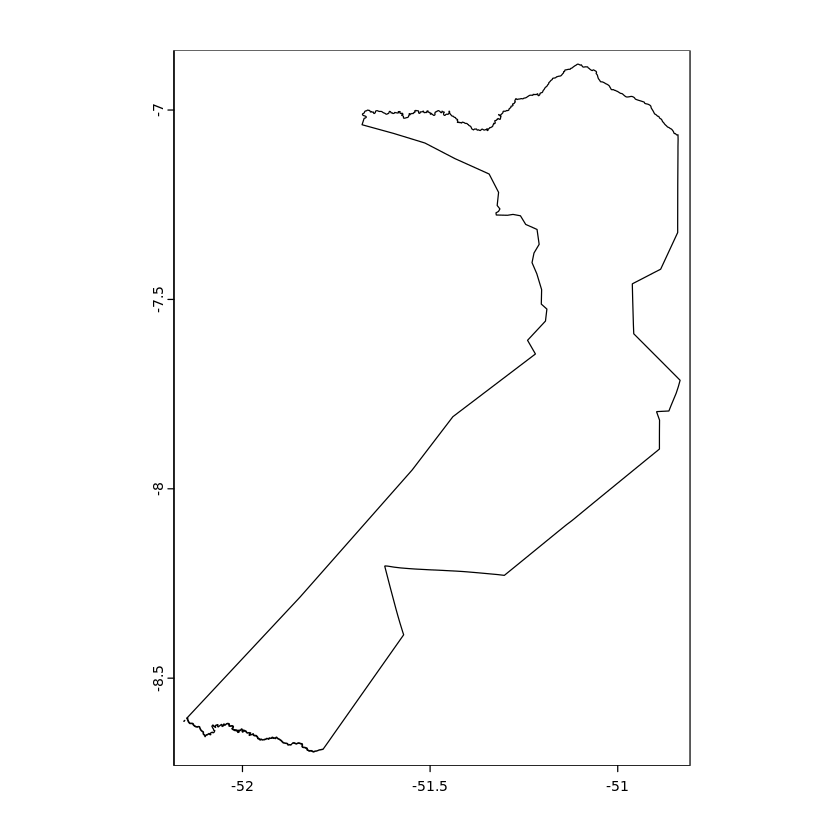

In [79]:
plot(KTeast)

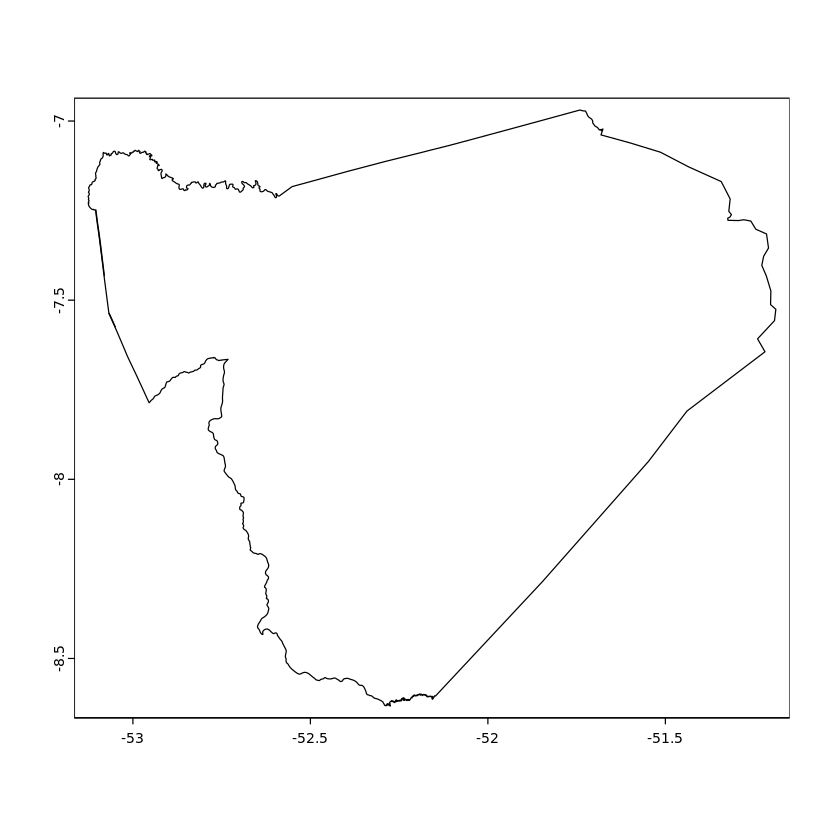

In [80]:
plot(KTwest)

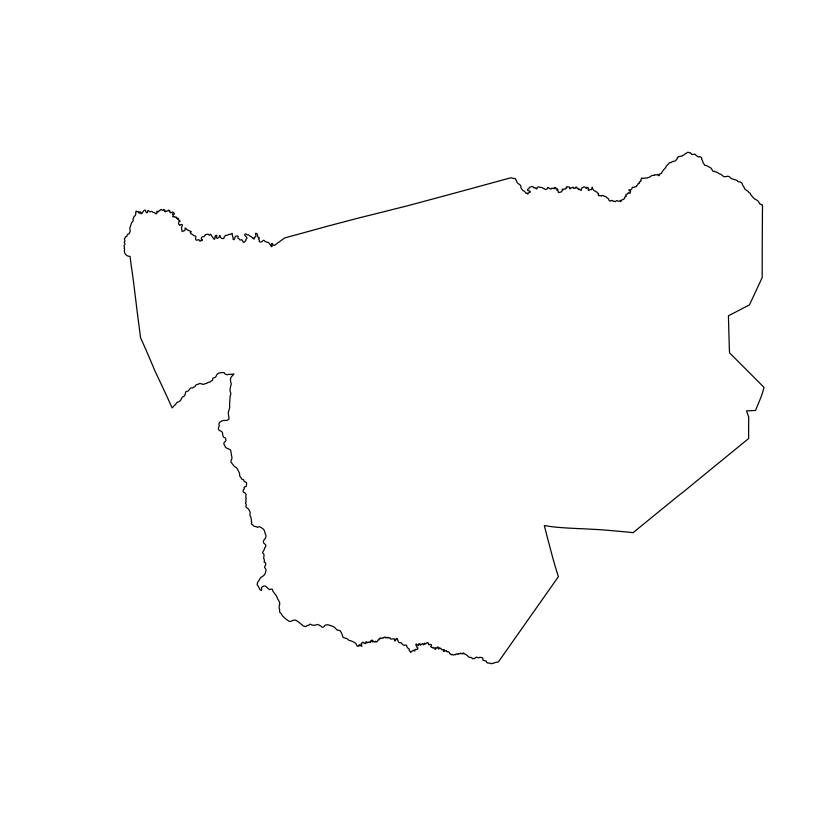

In [81]:
plot(KT)